# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>


### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Josefa Anselmo.
- Nombre de alumno 2: Tamara Carrasco.

### **Link de repositorio de GitHub:** [TamoJosha](https://github.com/Tamaracarrasco/TamoJosha-Lab-de-Prog-MDS-Prim2025)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.





### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**


**Respuesta 1:** 
El conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo, es decir, los valores internos que minimizan una función de error. Por ejemplo, en una regresión lineal, este conjunto permite estimar los coeficientes β que relacionan las variables predictoras con la variable respuesta.

El conjunto de validación, en cambio, no se usa para entrenar parámetros, sino para evaluar el desempeño intermedio del modelo y así seleccionar la mejor configuración de hiperparámetros (profundidad máxima de un árbol, número de neuronas en una red, etc.). De esta forma se busca evitar sobreajuste y elegir el modelo con mejor capacidad de generalización.

Como nota adicional, existe el conjunto de prueba, que se reserva para la etapa final y se emplea únicamente para estimar el rendimiento del modelo con datos totalmente nuevos, garantizando así una evaluación objetiva de su capacidad predictiva.

**Respuesta 2:** 
El principal desafío al abordar un problema de clasificación en un escenario no supervisado es la ausencia de etiquetas de clase.

En un modelo supervisado, las etiquetas permiten entrenar al algoritmo aprendiendo patrones entre las variables predictoras y la clase objetivo, y posteriormente evaluar su desempeño comparando predicciones contra la verdad conocida. En cambio, en un contexto no supervisado no existe esta referencia pues el modelo debe descubrir estructuras o agrupaciones únicamente a partir de las características de los datos.

Esto dificulta tanto el entrenamiento (no hay un criterio explícito que guíe la separación entre clases) como la evaluación (es complejo determinar si los grupos encontrados representan categorías útiles o coherentes sin información externa).

**Repsuesta 3:** 
La matriz de confusión es una tabla que resume los resultados de un modelo de clasificación, mostrando cuántas observaciones de cada clase fueron correctamente clasificadas y cuántas fueron confundidas con otra clase.

En ella, cada fila corresponde normalmente a las clases reales y cada columna a las clases predichas por el modelo (o viceversa). De este modo, en la diagonal principal aparecen las predicciones correctas, mientras que fuera de la diagonal se reflejan los errores.

Se utiliza porque permite analizar con mayor detalle el desempeño del modelo. Entonces, no solo indica la exactitud global, sino que muestra qué clases se confunden entre sí, y a partir de ella se pueden calcular métricas importantes como precisión, recall y F1-score.

**Respuesta 4:** 
Considerando un problema de clasificación binaria con:

- TP: verdaderos positivos
- TN: verdaderos negativos
- FP: falsos positivos
- FN: falsos negativos

* Accuracy: Indica la proporción de predicciones correctas sobre el total de casos. Es una medida global, aunque puede ser poco informativa si las clases están desbalanceadas.
$$
\frac{TP + TN}{TP + TN + FP +FN}
$$

* Precision: De todos los casos que el modelo predijo como positivos, muestra cuántos realmente son positivos. Es clave cuando el costo de un falso positivo es alto.

$$
\frac{TP}{TP + FP}
$$


* Recall: De todos los casos positivos reales, mide cuántos fueron detectados por el modelo. Es importante cuando el costo de un falso negativo es alto.

$$
\frac{TP}{TP + FN}
$$

* F1-Score: Es la media armónica entre precision y recall, equilibrando ambas métricas. El factor 2 se debe a la definición de la media armónica. Resulta útil cuando se necesita un balance entre detectar positivos y evitar falsos positivos.

$$
F1- Score = 2\frac{Precision \cdot Recall}{Precision + Recall}
$$
El F1-Score es la media armónica entre precision y recall, equilibrando ambas métricas. El factor 2 proviene de la definición de la media armónica.

Estas métricas también pueden extenderse a problemas multiclase mediante esquemas como micro, macro o weighted averaging.

**Respuesta 5**:
1. **Mantenimiento predictivo en minería**: La clase positiva es la falla de la máquina. El costo de un falso negativo (no detectar una falla real) puede ser muy alto, ya que genera accidentes o pérdidas millonarias. Sin embargo, un exceso de falsos positivos implica parar innecesariamente la operación. Por ello, se recomienda el F1-score, que balancea recall y precision.

2. **Detección de enfermedades altamente contagiosas**: Aquí el riesgo principal son los falsos negativos (personas enfermas clasificadas como sanas), que permiten la propagación de la enfermedad. Se debe priorizar el Recall, aunque eso implique más falsos positivos (aislar a alguien sano).

3. **Aprobación de créditos de alto riesgo**: El error más grave es un falso positivo (aprobar un crédito riesgoso como si fuera seguro). Lo fundamental es asegurar que quienes son aprobados realmente lo merecen, por lo que se recomienda maximizar la Precision.

4. **Detección de crímenes**: El objetivo es no pasar por alto situaciones delictivas, por lo que se debe maximizar el Recall. Sin embargo, desplegar recursos en exceso debido a falsos positivos también es costoso. En este contexto, el F1-score resulta adecuado para equilibrar ambos aspectos.

**Respuesta 6:** 
La calibración de modelos consiste en ajustar las probabilidades estimadas por un modelo de clasificación de manera que reflejen lo más fielmente posible la probabilidad real de que una observación pertenezca a una clase determinada.

En la práctica, muchos modelos entregan probabilidades “mal calibradas”. Por ejemplo, un modelo puede asignar una probabilidad de 0.8, pero que en la realidad solo se cumple en el 60% de los casos. La calibración busca corregir este desajuste mediante técnicas como Platt Scaling o Isotonic Regression.

Se utiliza para mejorar la interpretabilidad y confiabilidad de las probabilidades predichas, lo cual es fundamental en contextos de toma de decisiones sensibles (ejemplo: medicina, riesgo crediticio o mantenimiento predictivo), donde no basta con clasificar, sino que es necesario conocer la probabilidad real asociada a cada evento.

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [1]:
# Tengo que aplicar este tratamiento para poder usar Pycaret sin problemas de versiones porque daba error todo el rato
!pip -q uninstall -y scikit-learn imbalanced-learn pandas numpy scipy matplotlib umap-learn xarray plotnine || true
!pip -q install --no-deps scikit-learn==1.3.2 imbalanced-learn==0.11.0 numpy==1.26.4 pandas==2.1.4 scipy==1.11.4 matplotlib==3.7.5
!pip -q install pycaret==3.3.2 lightgbm==4.0.0 xgboost==1.7.6 catboost==1.2.5 umap-learn==0.5.5


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\senza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\senza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Importo librerias necesarias para esta etapa
import sklearn, imblearn, numpy, pandas, matplotlib

from pycaret.classification import setup, compare_models, pull, get_config

## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

Importamos las librerías

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder

Importamos la base de datos

In [4]:
data = pd.read_csv("stats_players.csv", sep=",")

Despliego algunos estadísticos descriptivos

In [5]:
print("Dimensiones del dataset de los stats", data.shape)

print("Columnas del dataset de stats", data.columns.tolist())

print("Información de los valores de las columnas")
data.info()
data.head()

Dimensiones del dataset de los stats (17588, 39)
Columnas del dataset de stats ['Name', 'Nationality', 'National_Position', 'Club_Position', 'Height', 'Weight', 'Preffered_Foot', 'Age', 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys']
Información de los valores de las columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               17588 non-null  object
 1   Nationality        17588 non-null  object
 2   National_Position  1075 non-null   object
 3   Club_Positi

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


**Pregunta 1**

In [6]:
# Estadísticos variable National_Position

print("Conteo de valores de National_Position \n", data["National_Position"].value_counts(dropna=False))

print("\n Cantidad de valores únicos de National_Position: ", data["National_Position"].nunique())

Conteo de valores de National_Position 
 National_Position
NaN    16513
Sub      556
LCB       48
GK        47
RCB       46
LB        39
RB        38
RM        34
LM        32
ST        30
LCM       25
RCM       25
LDM       19
CAM       19
RDM       18
RS        18
LS        18
CB         9
CDM        9
CM         9
RW         7
LW         7
LWB        4
RAM        4
LAM        4
RWB        4
RF         3
LF         3
Name: count, dtype: int64

 Cantidad de valores únicos de National_Position:  27


In [7]:
# Creación label

# Primero relleno los NaN de National_Position con la palabra "Vacío"

data["National_Position"] = data["National_Position"].fillna("Vacío")

# Aquí procedo a crear la variable "label" (0 y 1) en base a National_Position
# y considerando la modificación previa en la variable con "Vacío"

data.loc[data["National_Position"] == "Vacío", "label"] = 0
data.loc[data["National_Position"] != "Vacío", "label"] = 1

In [8]:
# Aplico el value counts para poder comprobar que se asignaron correctamente considerando que previo a todo había aplicado esto para National_Position.
data["label"].value_counts()

label
0.0    16513
1.0     1075
Name: count, dtype: int64

**Pregunta 2:**

Se observa un fuerte desbalance de clases, donde menos de un 7% de los registros corresponden a la clase positiva (seleccionados). Esto implica que un modelo que predijera siempre “no seleccionado” ya alcanzaría una accuracy cercana al 94%. Sin embargo, sería un modelo inútil. Por lo tanto, este desbalance debe ser tenido en cuenta en el modelado (p. ej. ajustando pesos de clase, aplicando técnicas de sobremuestreo/undersampling, o usando métricas como recall, precision o F1-score en lugar de solo accuracy).

**Pregunta 3:** 

In [9]:
# Listar columnas
drop_cols = [
    "Name",
    "National_Position"
]

# 2. OHE (cardinalidad moderada)
ohe_nationality = ["Nationality"]

# 4. Club_Position: OHE + imputación (1 missing) -> NO se dropean filas
ohe_clubpos = ["Club_Position"]

# 7. Preferred_Foot: Dejamos explícitamente el orden ['Left','Right'] y drop='if_binary'
#    => la única columna resultante será el indicador de 'Right' (1 = Right).
ohe_binary_foot = ["Preffered_Foot"]

# 9. Work_Rate: OHE
ohe_workrate = ["Work_Rate"]

# 10–11. Ordinal (1..5)

ord_1to5 = ["Weak_foot", "Skill_Moves"]
cats_1to5 = [[1, 2, 3, 4, 5]] * len(ord_1to5)

# 5–6, 8, 12–39. Numéricas (StandardScaler)
num_std = [
    "Height", "Weight", "Age",
    "Ball_Control", "Dribbling", "Marking", "Sliding_Tackle", "Standing_Tackle",
    "Aggression", "Reactions", "Interceptions", "Vision",
    "Composure", "Crossing", "Short_Pass", "Long_Pass",
    "Acceleration", "Speed", "Stamina", "Strength", "Balance", "Agility",
    "Jumping", "Heading",
    "Shot_Power", "Finishing", "Long_Shots", "Curve",
    "Freekick_Accuracy", "Penalties", "Volleys"
]

# PIPELINES POR GRUPO
num_std_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc",  StandardScaler())
])

cat_ohe_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

# Mapeo binario fijo: columna única = indicador de 'Right'
binary_foot_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(
        categories=[["Left","Right"]],
        drop="if_binary",
        handle_unknown="ignore",
        sparse_output=True
    ))
])

ordinal_1to5_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ord", OrdinalEncoder(
        categories=cats_1to5,
        handle_unknown="use_encoded_value",  # por si aparece algo fuera de 1..5
        unknown_value=-1
    ))
])

# COLUMNTRANSFORMER FINAL
col_transformer = ColumnTransformer(
    transformers=[
        ("drop_ids",     "drop",           drop_cols),
        ("num_std",      num_std_pipe,     num_std),
        ("ohe_nat",      cat_ohe_pipe,     ohe_nationality),
        ("ohe_clubpos",  cat_ohe_pipe,     ohe_clubpos),
        ("ohe_workrate", cat_ohe_pipe,     ohe_workrate),
        ("ohe_foot",     binary_foot_pipe, ohe_binary_foot),
        ("ord_1to5",     ordinal_1to5_pipe, ord_1to5),
    ],
    remainder="drop"
)

**Pregunta 4:** Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas.

En primer lugar, se descartaron aquellas variables que no aportan información útil para el modelado o que pueden inducir overfitting o data leakage.

Name se eliminó porque es un identificador único sin valor predictivo y que podría inducir al modelo a memorizar.

National_Position también fue descartada, ya que a partir de esta se generó directamente la variable objetivo (label), por lo cual mantenerla representaría una fuga de información. Además tenía más de un 90% de missing values.

En el caso de variables categóricas con alta cardinalidad, como Nationality, se aplicó OneHotEncoder con handle_unknown="ignore". Esta elección permite representar cada país como una variable binaria, evitando asignar un orden artificial inexistente y controlando el problema de países poco frecuentes que podrían aparecer en datos futuros.

Para Club_Position, categórica con baja cardinalidad, también se aplicó OneHotEncoder. El único valor faltante fue imputado con la moda, evitando descartar el registro completo. Esto se justifica dado que la pérdida de un jugador reduciría innecesariamente la base de entrenamiento.

En Preferred_Foot, categórica binaria (“Left”/“Right”), se utilizó OneHotEncoder con categorías definidas explícitamente. Esto asegura que la codificación refleje correctamente la lógica de la variable, resultando en un único indicador binario donde el valor 1 representa “Right”.

La variable Work_Rate, de naturaleza categórica ordinal compuesta (p.ej., “High/Low”), se transformó mediante OneHotEncoder. Aunque posee una componente ordinal implícita (High > Medium > Low), el hecho de que combine ataque y defensa hace más coherente tratarla como categorías independientes sin imponer un orden lineal.

Las variables ordinales de 1 a 5, como Weak_Foot y Skill_Moves, fueron codificadas con OrdinalEncoder. En estos casos, el orden sí es fundamental pues un jugador con 5 estrellas domina mejor que uno con 2, y esa información ordinal debe preservarse en la codificación.

En cuanto a las variables numéricas de atributos técnicos, físicos y psicológicos, tales como Height, Weight, Age, Ball_Control, Dribbling, Aggression, Reactions, Acceleration, Strength, Finishing, Stamina, Vision, entre otras (todas reportadas en el informe), se aplicó StandardScaler. La elección de este transformador se justifica porque la mayoría de estas variables se encuentran en una escala común (0–100 en los atributos técnicos, con distribuciones aproximadamente normales y solo leves asimetrías), lo cual permite que modelos sensibles a la escala, como máquinas de soporte vectorial o regresión logística regularizada, se beneficien al trabajar con predictores de media cero y desviación estándar uno. Previo al escalado, se utilizó SimpleImputer con la mediana como estrategia de imputación, ya que, a diferencia de la media, la mediana es más robusta frente a la presencia de outliers moderados observados en ciertas variables (por ejemplo, Height y Weight), evitando así que valores atípicos distorsionen la representación de los datos. Si bien los outliers son escasos, debemos imputarlos para no inducir pérdidas de observaciones en el entrenamiento.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



In [10]:
%pip install lightgbm
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\senza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\senza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


**Respuesta:**

<https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html>

**Pregunta 1**

In [11]:
from sklearn.model_selection  import train_test_split

df2_x = data.drop(columns="label").copy()
df2_y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(df2_x, df2_y, train_size=0.7, stratify=df2_y, random_state=42)

**Pregunta 2**

In [12]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Pipeline con XGBoost
pipeline_xgboost = Pipeline(
    steps=[
        ("col_transformer", col_transformer),
        ("classifier", XGBClassifier(
            n_estimators=100,
            learning_rate=0.01,
            objective="binary:logistic",
            device="cuda",             
            tree_method="gpu_hist",   
            verbosity=0,
            random_state=42
        ))
    ]
)

# Pipeline con LightGBM
pipeline_lightgbm = Pipeline(
    steps=[
        ("col_transformer", col_transformer),
        ("classifier", LGBMClassifier(
            boosting_type="gbdt",      
            objective="binary",    
            n_estimators=100,
            learning_rate=0.01,
            device="gpu",             
            random_state=42
        ))
    ]
)


**Pregunta 3**

In [13]:
## entrenamiento de xgb

pipeline_xgboost.fit(X_train, y_train)


## entrenamiento de lgbm
pipeline_lightgbm.fit(X_train, y_train)

## predicciones

y_pred_xgb = pipeline_xgboost.predict(X_test)
y_pred_lgbm = pipeline_lightgbm.predict(X_test)

  File "C:\Users\senza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[LightGBM] [Info] Number of positive: 752, number of negative: 11559
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2651
[LightGBM] [Info] Number of data points in the train set: 12311, number of used features: 139
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 36 dense feature groups (0.42 MB) transferred to GPU in 0.009079 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061084 -> initscore=-2.732483
[LightGBM] [Info] Start training from score -2.732483


**En esta etapa mantuvimos la distribución original vía stratified split. La corrección del desbalance se evaluará durante la validación (clase weights/SMOTE/umbral) según el comportamiento de Recall, Precision, F1 y AUC-PR.**

In [14]:
# Guardar pipelines y resultados en el computador

import os, joblib

# Definir carpeta 
base_path = os.path.join(os.getcwd(), "Laboratorios", "Laboratorio_5", "data")
os.makedirs(base_path, exist_ok=True)

# Guardar modelos entrenados
joblib.dump(pipeline_xgboost,  os.path.join(base_path, "xgboost_model.pkl"))
joblib.dump(pipeline_lightgbm, os.path.join(base_path, "lightgbm_model.pkl"))

# Guardar predicciones
pred_df = pd.DataFrame({
    "y_true": y_test,
    "y_pred_xgb": y_pred_xgb,
    "y_pred_lgbm": y_pred_lgbm
})
pred_df.to_csv(os.path.join(base_path, "predicciones_modelos.csv"), index=False)

# Guardar probabilidades para métricas AUC
y_proba_xgb  = pipeline_xgboost.predict_proba(X_test)[:, 1]
y_proba_lgbm = pipeline_lightgbm.predict_proba(X_test)[:, 1]

pd.DataFrame({
    "y_true": y_test,
    "proba_xgb": y_proba_xgb,
    "proba_lgbm": y_proba_lgbm
}).to_csv(os.path.join(base_path, "probas_modelos.csv"), index=False)

In [15]:
# Guardo modelos con pickle

import pickle

# Definir carpeta base
base_path = os.path.join(os.getcwd(), "Laboratorios", "Laboratorio_5", "data")
os.makedirs(base_path, exist_ok=True)

# Guardar predicciones
pd.DataFrame({"predicciones": y_pred_xgb}).to_csv(
    os.path.join(base_path, "predicciones_xgb.csv"), index=False
)

# Guardar modelo
with open(os.path.join(base_path, "xgboost_model.sav"), "wb") as f:
    pickle.dump(pipeline_xgboost, f)

# Cargar modelo
with open(os.path.join(base_path, "xgboost_model.sav"), "rb") as f:
    modelo_loaded = pickle.load(f)

# Usar modelo cargado
y_pred_modelo_loaded = modelo_loaded.predict(X_test)

In [16]:
# Definir carpeta base
base_path = os.path.join(os.getcwd(), "Laboratorios", "Laboratorio_5", "data")
os.makedirs(base_path, exist_ok=True)

# Guardar predicciones LGBM
pd.DataFrame({"predicciones": y_pred_lgbm}).to_csv(
    os.path.join(base_path, "predicciones_lgbm.csv"), index=False
)

# Guardar modelo LGBM
with open(os.path.join(base_path, "lightgbm_model.sav"), "wb") as f:
    pickle.dump(pipeline_lightgbm, f)

# Cargar modelo LGBM
with open(os.path.join(base_path, "lightgbm_model.sav"), "rb") as f:
    modelo_lgbm_loaded = pickle.load(f)

# Predicciones con modelo cargado
y_pred_lgbm_loaded = modelo_lgbm_loaded.predict(X_test)

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

**Pregunta 1**

In [17]:
# importación del reporte lo necesario

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Accuracy, precisión y recall de la clase positiva "manual"
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb, pos_label=1)
rec_xgb = recall_score(y_test, y_pred_xgb, pos_label=1)

print("XGBoost -> Accuracy:", acc_xgb, " Precision:", prec_xgb, " Recall:", rec_xgb)

acc_lgb = accuracy_score(y_test, y_pred_lgbm)
prec_lgb = precision_score(y_test, y_pred_lgbm, pos_label=1)
rec_lgb = recall_score(y_test, y_pred_lgbm, pos_label=1)

print("LightGBM -> Accuracy:", acc_lgb, " Precision:", prec_lgb, " Recall:", rec_lgb)

# Verificación con classification_report
print("\nReporte Métricas XGBoost")
print(classification_report(y_test, y_pred_xgb, digits=3))

print("\nReporte Métricas LGBM")
print(classification_report(y_test, y_pred_lgbm, digits=3))


XGBoost -> Accuracy: 0.9418230054955468  Precision: 0.6379310344827587  Recall: 0.11455108359133127
LightGBM -> Accuracy: 0.9389804813340913  Precision: 0.5555555555555556  Recall: 0.015479876160990712

Reporte Métricas XGBoost
              precision    recall  f1-score   support

         0.0      0.945     0.996     0.970      4954
         1.0      0.638     0.115     0.194       323

    accuracy                          0.942      5277
   macro avg      0.792     0.555     0.582      5277
weighted avg      0.926     0.942     0.922      5277


Reporte Métricas LGBM
              precision    recall  f1-score   support

         0.0      0.940     0.999     0.968      4954
         1.0      0.556     0.015     0.030       323

    accuracy                          0.939      5277
   macro avg      0.748     0.507     0.499      5277
weighted avg      0.916     0.939     0.911      5277



**Pregunta 2**

Los resultados muestran que el accuracy es cercano a 0.94 tanto en XGBoost como en LightGBM, lo que indica un alto nivel de aciertos generales. Sin embargo, este valor está fuertemente condicionado por la clase negativa (jugadores no seleccionados), que es mayoritaria en la base de datos, por lo que no refleja adecuadamente el desempeño sobre la clase de interés. En cuanto a la precisión de la clase positiva, XGBoost alcanza aproximadamente 0.64, mientras que LightGBM cae a 0.56; esto significa que, de los jugadores predichos como seleccionados, un 64% y un 56% respectivamente lo son en la realidad, siendo XGBoost más confiable en esta tarea. El recall de la clase positiva es muy bajo en ambos casos (con 0.11 en XGBoost y 0.015 en LightGBM), lo que implica que de todos los jugadores realmente seleccionados, el primero logra identificar apenas un 11% y el segundo solo un 1.5%. Esta diferencia muestra cómo el desbalance de clases afecta los resultados, pues al ser los seleccionados una minoría, los modelos se inclinan a predecir la clase mayoritaria, sacrificando la detección de la clase positiva.

**Pregunta 3**

En este escenario, el accuracy no es una métrica adecuada, ya que oculta el bajo rendimiento en la clase de interés. La métrica más apropiada es el F1-score de la clase positiva, porque equilibra precisión y recall. Según este criterio, XGBoost obtiene un F1 cercano a 0.19, superando a LightGBM, que alcanza solo 0.03 con un recall prácticamente nulo. Por lo tanto, XGBoost muestra un desempeño claramente superior en la detección de jugadores seleccionados nacionales, aunque los resultados evidencian la necesidad de aplicar estrategias adicionales para abordar el desbalance de clases.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

**Pregunta 1**

In [18]:
# Copio el data frame
data_copy = data.drop(columns=[c for c in data.columns if c.lower() == "label"], errors="ignore").copy()

# Excluir suplentes y reservas
data_copy = data_copy[~data_copy["Club_Position"].isin(["Sub", "Res"])].copy()

# Mapeo solicitado
codigo_categorias = {
    "ST": "ataque", "CF": "ataque",
    "RW": "central_ataque", "CAM": "central_ataque", "LW": "central_ataque",
    "RM": "central", "CM": "central", "LM": "central",
    "RWB": "central_defensa", "CDM": "central_defensa", "LWB": "central_defensa",
    "RB": "defensa", "CB": "defensa", "LB": "defensa",
    "GK": "arquero"
}

data_copy["label"] = data_copy["Club_Position"].map(codigo_categorias)
data_copy = data_copy.dropna(subset=["label"]).reset_index(drop=True)

# Vista rápida
print(data_copy[["Club_Position", "label"]].head())

  Club_Position           label
0            LW  central_ataque
1            RW  central_ataque
2            LW  central_ataque
3            ST          ataque
4            GK         arquero


**Pregunta 2**

In [19]:
# Conteo
conteos = data_copy["label"].value_counts()
porcentajes = data_copy["label"].value_counts(normalize=True).mul(100).round(2)

print("Conteo por clase:\n", conteos, "\n")
print("Porcentajes (%):\n", porcentajes.rename("proportion"))

Conteo por clase:
 label
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64 

Porcentajes (%):
 label
defensa            29.96
central            23.03
arquero            16.04
central_ataque     14.75
ataque             10.92
central_defensa     5.31
Name: proportion, dtype: float64


**Pregunta 3**

In [20]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

# Features y target
X = data_copy.drop(columns=["Club_Position", "label"], errors="ignore").copy()
y = data_copy["label"].copy()

# Columnas
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_candidates = ["Nationality", "Preffered_Foot", "Work_Rate"]  # agrega otras si existen en X
cat_cols = [c for c in cat_candidates if c in X.columns]

# Preprocesamiento
num_transformation = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc",  StandardScaler())
])

cat_transformation = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

col_transformer = ColumnTransformer(
    transformers=[
        ("num", num_transformation, num_cols),
        ("cat", cat_transformation, cat_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, stratify=y, random_state=42
)

# Pipeline clasificador
pipeline_svc = Pipeline([
    ("col_transformer", col_transformer),
    ("classifier", LinearSVC(class_weight="balanced", random_state=42, max_iter=10000))
])

# Entrenamiento y evaluación
pipeline_svc.fit(X_train, y_train)
y_pred = pipeline_svc.predict(X_test)

print("Classification report")
print(classification_report(y_test, y_pred, digits=3))

labels_sorted = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels_sorted)
cm_df = pd.DataFrame(cm, index=[f"true_{c}" for c in labels_sorted],
                     columns=[f"pred_{c}" for c in labels_sorted])
print("Matriz de confusión")
print(cm_df)

Classification report
                 precision    recall  f1-score   support

        arquero      1.000     1.000     1.000       190
         ataque      0.745     0.860     0.799       129
        central      0.636     0.430     0.513       272
 central_ataque      0.458     0.500     0.478       174
central_defensa      0.263     0.333     0.294        63
        defensa      0.841     0.924     0.880       354

       accuracy                          0.722      1182
      macro avg      0.657     0.675     0.661      1182
   weighted avg      0.722     0.722     0.716      1182

Matriz de confusión
                      pred_arquero  pred_ataque  pred_central  \
true_arquero                   190            0             0   
true_ataque                      0          111             7   
true_central                     0           15           117   
true_central_ataque              0           23            45   
true_central_defensa             0            0             

In [21]:
# Guardar modelo

# Definir carpeta base
SAVE_DIR = os.path.join(os.getcwd(), "Laboratorios", "Laboratorio_5", "data")
os.makedirs(SAVE_DIR, exist_ok=True)

# Guardar modelo SVC
joblib.dump(pipeline_svc, os.path.join(SAVE_DIR, "linear_svc_positions.pkl"))

# Guardar predicciones
pred_out = pd.DataFrame({
    "y_true": y_test.values,
    "y_pred": y_pred
})
pred_out.to_csv(os.path.join(SAVE_DIR, "predicciones_positions.csv"), index=False)

print(f"\nModelo guardado en: {os.path.join(SAVE_DIR, 'linear_svc_positions.pkl')}")
print(f"Predicciones guardadas en: {os.path.join(SAVE_DIR, 'predicciones_positions.csv')}")


Modelo guardado en: c:\Users\senza\OneDrive\Escritorio\Josefa\9. MDS UCH\Semestres\Primavera 2025\Laboratorio de Programación Científica\Laboratorios\TamoJosha\Laboratorios\Laboratorio_5\Laboratorios\Laboratorio_5\data\linear_svc_positions.pkl
Predicciones guardadas en: c:\Users\senza\OneDrive\Escritorio\Josefa\9. MDS UCH\Semestres\Primavera 2025\Laboratorio de Programación Científica\Laboratorios\TamoJosha\Laboratorios\Laboratorio_5\Laboratorios\Laboratorio_5\data\predicciones_positions.csv


**Pregunta 4:**

Los resultados muestran un desempeño heterogéneo según la clase. En primer lugar, la categoría arquero se predice de manera perfecta, con precisión, recall y F1-score de 1.00, lo que indica que el modelo no tiene dificultades para identificar esta posición, probablemente porque sus atributos físicos y técnicos son muy distintos a los de las demás posiciones. En contraste, las posiciones de campo presentan desempeños más dispares. 

En defensa, que además es la clase más numerosa (≈30% de los ejemplos), se obtiene un recall de 0.92 y precisión de 0.84, alcanzando un F1 de 0.88; esto refleja que el modelo captura correctamente a la mayoría de los defensas, con algunas confusiones hacia categorías vecinas. La clase ataque también logra resultados satisfactorios, con recall de 0.86 y precisión de 0.75 (F1 = 0.80), lo que sugiere que identifica a la mayoría de los delanteros aunque con cierta confusión hacia posiciones más centrales. 

En cambio, en central el rendimiento es intermedio: precisión 0.64, recall 0.43 y F1 0.51; la matriz de confusión evidencia que una proporción relevante de jugadores de esta categoría se confunden como central_ataque o incluso como defensa, lo que indica superposición de atributos con ambas posiciones. Este patrón de confusión también aparece en central_ataque, donde se observa recall 0.50, precisión 0.46 y F1 0.48; muchos jugadores son clasificados como central, reflejando la cercanía en perfiles técnicos entre estas dos clases. Finalmente, central_defensa, además de ser la menos representada en el dataset (≈5%), obtiene los peores resultados (precisión 0.26, recall 0.33, F1 0.29), con una fuerte absorción hacia defensa, algo esperable por la proximidad funcional. 

En términos globales, el modelo alcanza un accuracy de 0.72 y un F1-score macro de 0.66, lo que refleja un desempeño razonable pero con claras diferencias entre clases: el buen rendimiento en arquero, defensa y ataque contrasta con las dificultades en las posiciones intermedias, donde el solapamiento de atributos y la menor representatividad limitan la capacidad del clasificador para distinguirlas correctamente.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

**Pregunta 1**

In [22]:
from pycaret.classification import setup, compare_models, pull, get_config

df_tree = data_copy.copy()
ignore_cols = [c for c in ["Club_Position", "Name"] if c in df_tree.columns]

clf_setup = setup(
    data=df_tree,
    target="label",
    session_id=42,
    fold=3,
    use_gpu=False,
    verbose=False,
    ignore_features=ignore_cols
)

tree_models = ['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
best_tree = compare_models(include=tree_models, sort='Precision', turbo=True)

results_compare = pull()
display(results_compare)
print("\nMejor modelo según 'Precision':", best_tree)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7443,0.9294,0.7443,0.7314,0.7172,0.6704,0.6776,1.5100
rf,Random Forest Classifier,0.7439,0.9300,0.7439,0.7306,0.7204,0.6709,0.6763,1.1300
catboost,CatBoost Classifier,0.7428,0.9301,0.7428,0.7277,0.7295,0.6719,0.6741,5.2967
lightgbm,Light Gradient Boosting Machine,0.7338,0.9250,0.7338,0.7176,0.7180,0.6599,0.6622,2.4100
xgboost,Extreme Gradient Boosting,0.7291,0.9259,0.7291,0.7103,0.7142,0.6544,0.6565,1.7833
dt,Decision Tree Classifier,0.6478,0.7809,0.6478,0.6496,0.6486,0.5575,0.5576,1.0867


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7443,0.9294,0.7443,0.7314,0.7172,0.6704,0.6776,1.5100
rf,Random Forest Classifier,0.7439,0.9300,0.7439,0.7306,0.7204,0.6709,0.6763,1.1300
catboost,CatBoost Classifier,0.7428,0.9301,0.7428,0.7277,0.7295,0.6719,0.6741,5.2967
lightgbm,Light Gradient Boosting Machine,0.7338,0.9250,0.7338,0.7176,0.7180,0.6599,0.6622,2.4100
xgboost,Extreme Gradient Boosting,0.7291,0.9259,0.7291,0.7103,0.7142,0.6544,0.6565,1.7833
dt,Decision Tree Classifier,0.6478,0.7809,0.6478,0.6496,0.6486,0.5575,0.5576,1.0867



Mejor modelo según 'Precision': ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


**Pregunta 2**

['dt'] Decision Tree (árbol de decisión):
- Modelo no lineal que particiona el espacio de features mediante reglas if-else.
- Construye nodos que maximizan ganancia de información (p. ej., Gini/Entropía) hasta cierto criterio de parada.
- Pros: interpretables, entrenan rápido, manejan mixtura de tipos, poca preparación de datos.
- Contras: tienden a sobreajustar si no se podan o regularizan (profundidad máxima, min_samples_leaf, etc.).

['rf'] Random Forest (bosque aleatorio):
- Ensamble de muchos árboles entrenados sobre bootstraps de los datos y subconjuntos aleatorios de features.
- Promedia las predicciones (votación) para reducir varianza del árbol individual.
- Pros: robusto al overfitting, buen desempeño out-of-the-box, maneja no linealidades.
- Contras: menos interpretable que un árbol único; tamaño de modelo y tiempo de predicción mayores que DT.

['et'] Extra Trees (Extremely Randomized Trees):
- Similar a Random Forest, pero introduce más aleatoriedad en los splits (umbrales elegidos al azar).
- Suele reducir la varianza aún más y acelerar entrenamiento.
- Pros: muy rápido en entrenamiento, buen rendimiento, menos varianza.
- Contras: puede perder algo de precisión vs RF en algunos casos; interpretabilidad similar a RF.


**Pregunta 3**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

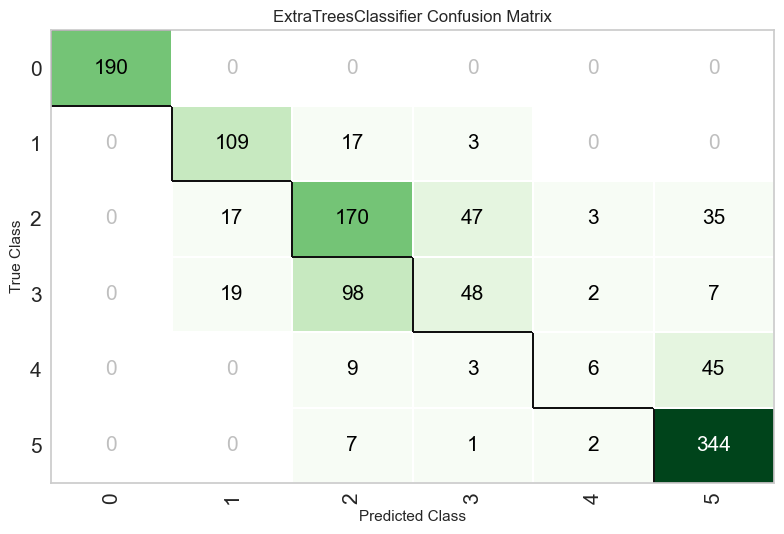

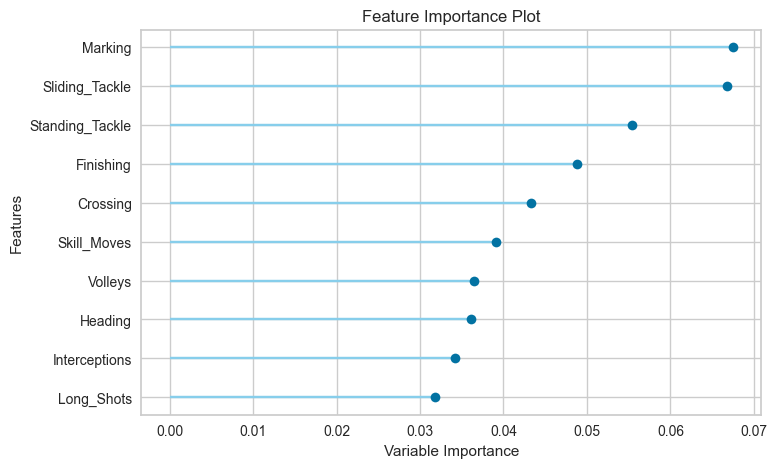

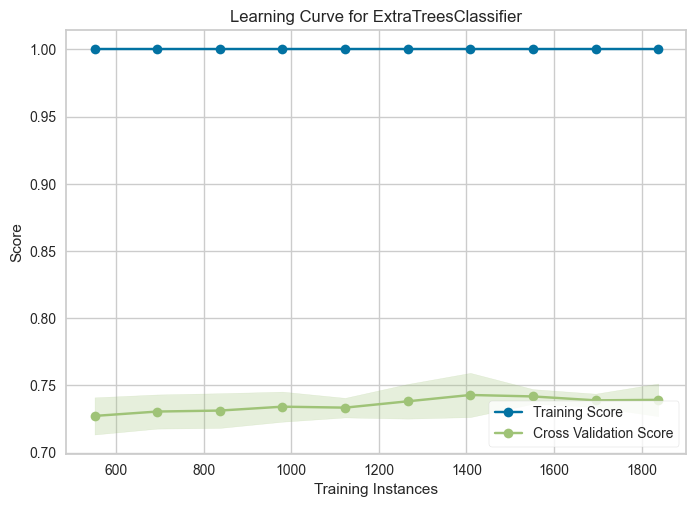

Classification report (holdout)
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       190
         ataque       0.75      0.84      0.80       129
        central       0.56      0.62      0.59       272
 central_ataque       0.47      0.28      0.35       174
central_defensa       0.46      0.10      0.16        63
        defensa       0.80      0.97      0.88       354

       accuracy                           0.73      1182
      macro avg       0.67      0.64      0.63      1182
   weighted avg       0.71      0.73      0.71      1182

Confusion Matrix (holdout)
[[190   0   0   0   0   0]
 [  0 109  17   3   0   0]
 [  0  17 170  47   3  35]
 [  0  19  98  48   2   7]
 [  0   0   9   3   6  45]
 [  0   0   7   1   2 344]]
Transformation Pipeline and Model Successfully Saved

Modelo guardado en: (Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=N

In [23]:
from pycaret.classification import evaluate_model, plot_model, predict_model, get_config, save_model

# Evaluacion inicial
evaluate_model(best_tree)

# Plot solicitados
plot_model(best_tree, plot='confusion_matrix')
plot_model(best_tree, plot='feature')
plot_model(best_tree, plot='learning')


# Para poder hacer estos modelos debia ser con un caso binario, aqui es multiclase y pycaret no soporta eso.
# plot_model(best_tree, plot='threshold')
# plot_model(best_tree, plot='calibration')

# Predicción en holdout y reporte clásico
X_test_pc = get_config('X_test')
y_test_pc = get_config('y_test')

pred_test = predict_model(best_tree, data=X_test_pc) 
label_col = 'prediction_label' if 'prediction_label' in pred_test.columns else (
    'Label' if 'Label' in pred_test.columns else None
)
if label_col is None:
    raise ValueError(f"No encontré la columna de predicción en predict_model(). "
                     f"Columnas: {list(pred_test.columns)[:25]}")

y_true = np.asarray(y_test_pc)
y_pred = pred_test[label_col].to_numpy()

print("Classification report (holdout)")
print(classification_report(y_true, y_pred))
print("Confusion Matrix (holdout)")
print(confusion_matrix(y_true, y_pred))

# Ajuste de umbral para reducir falsos positivos en modelos binarios que en este caso creo que es solo thrshold
classes = np.sort(np.unique(y_true))
if len(classes) == 2:
    pos_label = classes[-1]      
    neg_label = classes[0]

    # Probabilidades por clase
    proba_df = predict_model(best_tree, data=X_test_pc, raw_score=True)

    # Columnas de probas
    exclude = set(X_test_pc.columns) | {label_col, 'prediction_score'}
    proba_cols = [c for c in proba_df.columns if c not in exclude]

    # Columna de probas de la clase positiva
    cand = [c for c in proba_cols
            if str(c).lower() == str(pos_label).lower()
            or str(c).lower().endswith(f"_{str(pos_label).lower()}")]

    if cand:
        scores = proba_df[cand[0]].to_numpy()
        thr = 0.60  
        y_pred_thr = np.where(scores >= thr, pos_label, neg_label)

        print(f"Métricas con umbral {thr:.2f} (binario)")
        print(classification_report(y_true, y_pred_thr))
        print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_thr))

#  Guardar el mejor modelo
SAVE_DIR = os.path.join(os.getcwd(), "Laboratorios", "Laboratorio_5", "data")
os.makedirs(SAVE_DIR, exist_ok=True)

# Guardar modelo
save_path = save_model(best_tree, os.path.join(SAVE_DIR, "best_tree_pycaret")) 

print(f"\nModelo guardado en: {save_path}")

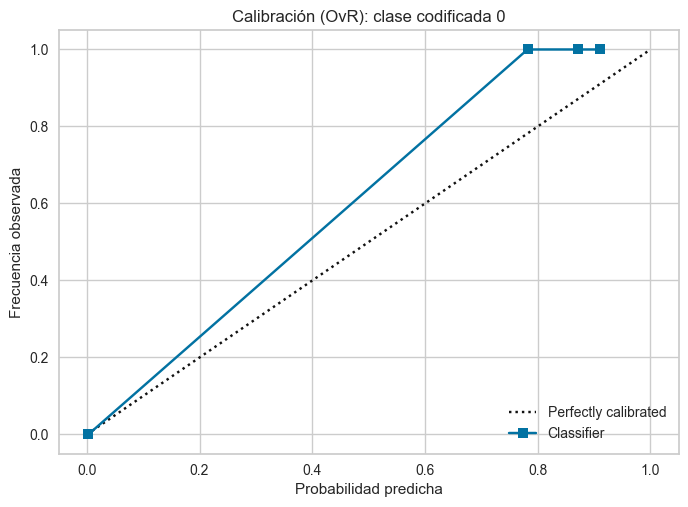

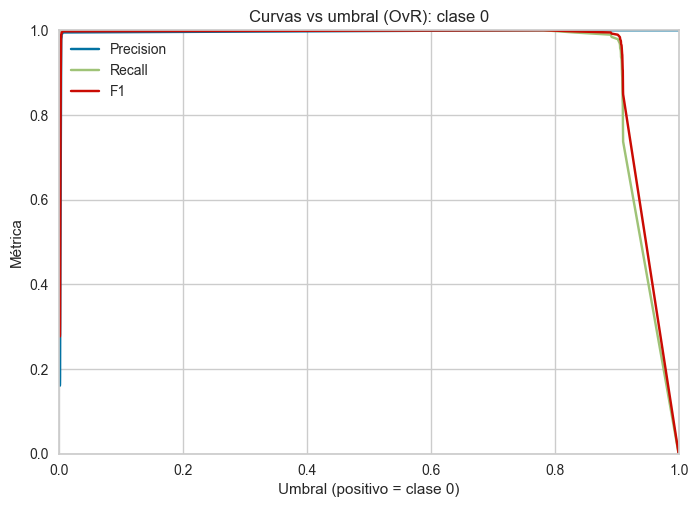

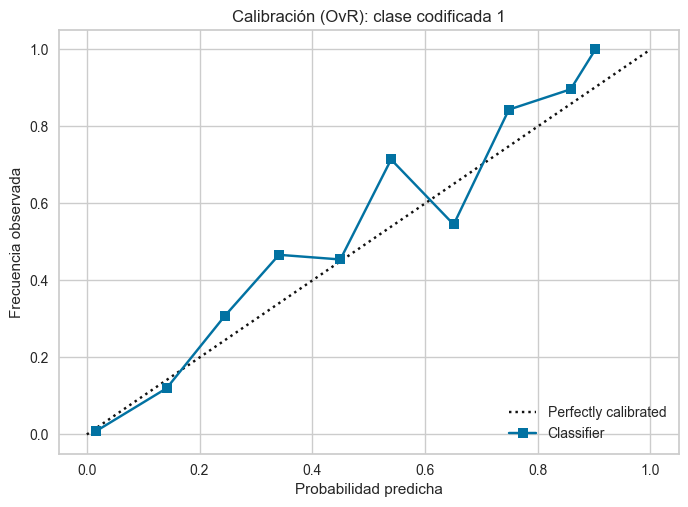

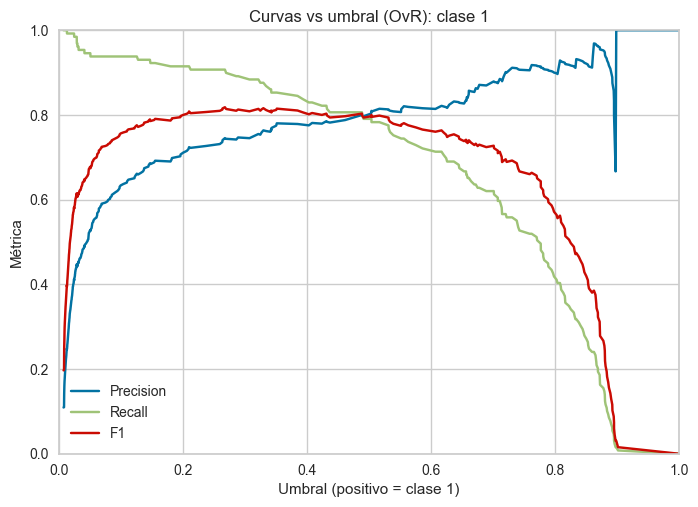

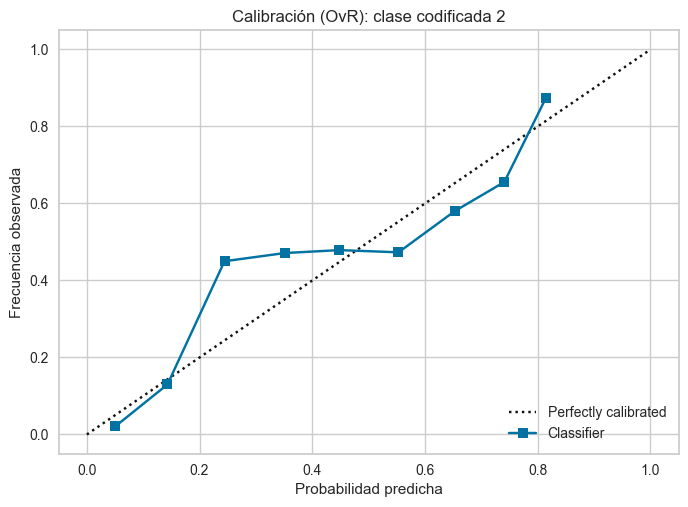

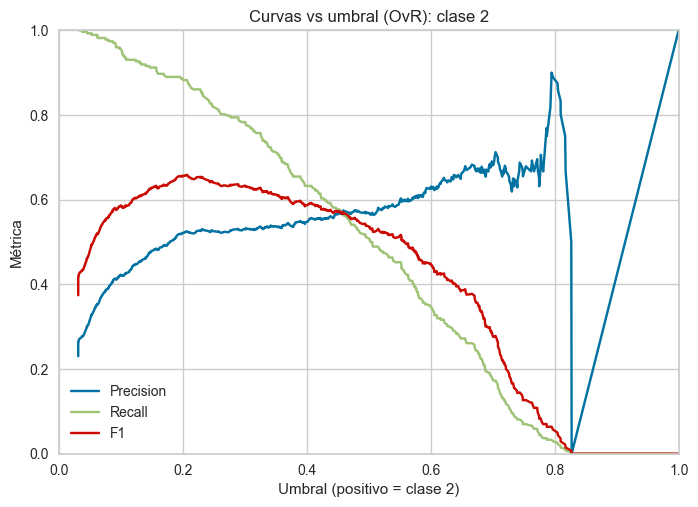

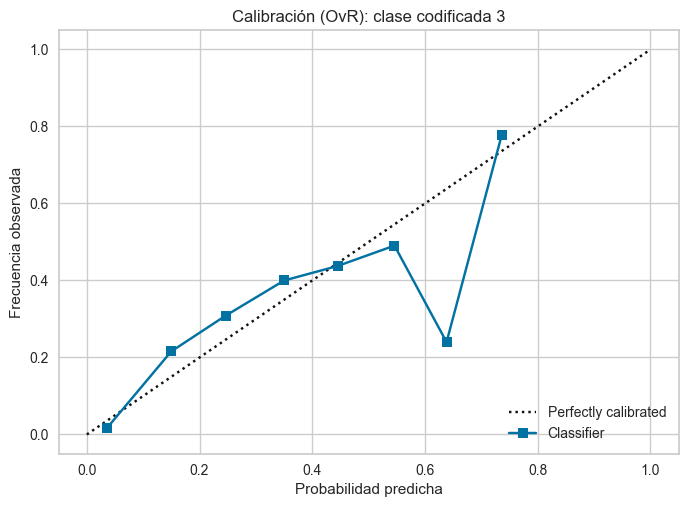

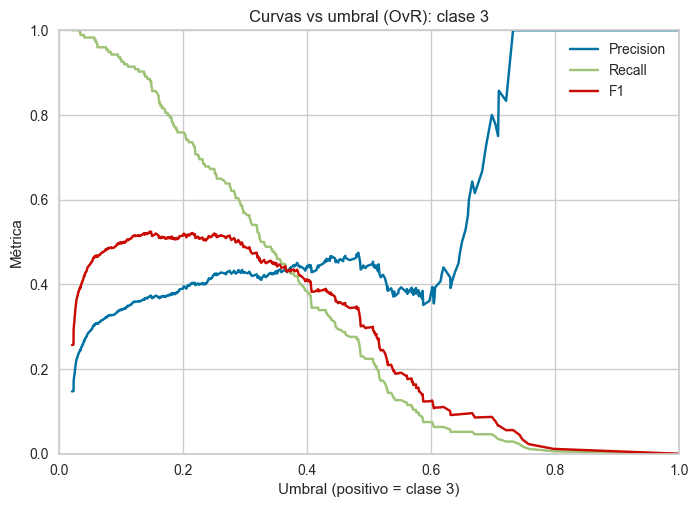

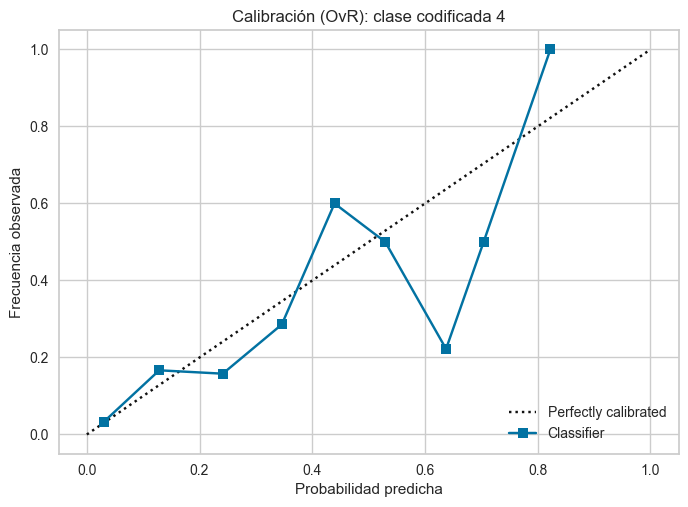

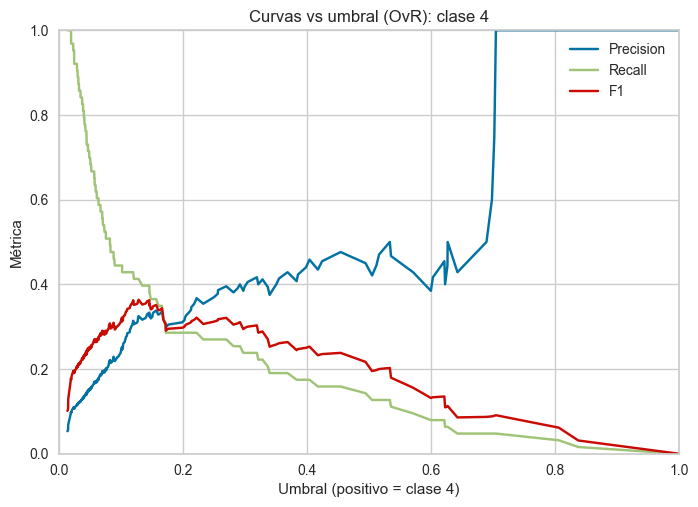

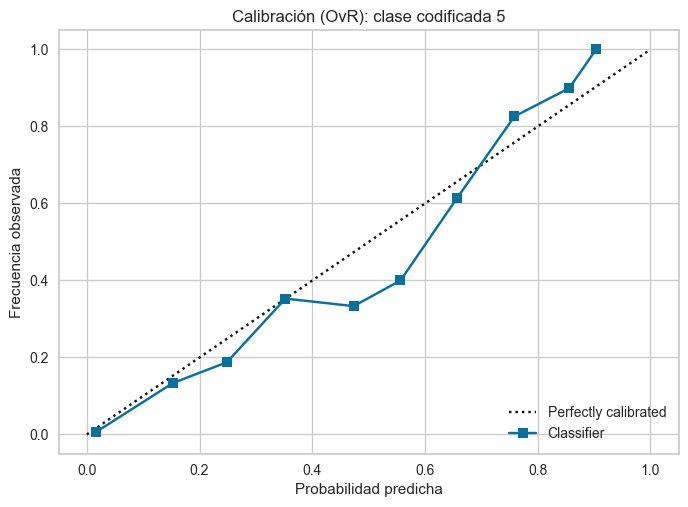

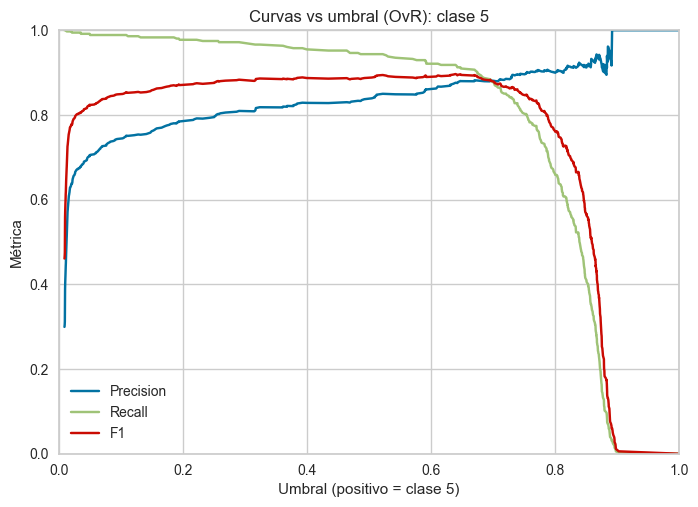

In [31]:
# Opcion de reemplazo para poder plotear "threshold" y "calibration" en multiclase con scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.calibration import CalibrationDisplay
from pycaret.classification import get_config, calibrate_model

# 1) Calibrar el mejor modelo para obtener predict_proba
calibrated = calibrate_model(best_tree, method='sigmoid', fold=5, verbose=False)

# 2) Tomar X_test / y_test en las dos versiones
X_test = get_config('X_test')
y_test_orig = get_config('y_test')                  # etiquetas originales (strings)
y_test_enc  = get_config('y_test_transformed')      # etiquetas codificadas (enteros)  <-- USAR ÉSTE

# 3) Probabilidades por clase (si el modelo necesita X transformado, PyCaret lo maneja)
try:
    proba = calibrated.predict_proba(X_test)
except Exception:
    X_test_trans = get_config('X_test_transformed')
    proba = calibrated.predict_proba(X_test_trans)

classes_enc = np.array(calibrated.classes_)         # e.g., [0,1,2,3,4]

# (Opcional) limitar cuántas clases graficar si son muchas
clases_a_graficar = classes_enc

for i, cls_enc in enumerate(clases_a_graficar):
    # y_test_bin en **espacio codificado**
    y_bin = (np.asarray(y_test_enc) == cls_enc).astype(int)
    scores = proba[:, i]

    # --- Calibración ---
    fig, ax = plt.subplots()
    CalibrationDisplay.from_predictions(y_bin, scores, n_bins=10, ax=ax)
    ax.set_title(f"Calibración (OvR): clase codificada {cls_enc}")
    ax.set_xlabel("Probabilidad predicha")
    ax.set_ylabel("Frecuencia observada")
    plt.show()

    # --- Métricas vs umbral ---
    prec, rec, thr = precision_recall_curve(y_bin, scores)
    thr_full = np.r_[thr, 1.0]
    f1 = 2 * (prec * rec) / (prec + rec + 1e-12)

    fig, ax = plt.subplots()
    ax.plot(thr_full, prec, label="Precision")
    ax.plot(thr_full, rec,  label="Recall")
    ax.plot(thr_full, f1,   label="F1")
    ax.set_xlim(0, 1); ax.set_ylim(0, 1)
    ax.set_xlabel(f"Umbral (positivo = clase {cls_enc})")
    ax.set_ylabel("Métrica")
    ax.set_title(f"Curvas vs umbral (OvR): clase {cls_enc}")
    ax.legend()
    plt.show()



### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

**Pregunta 1**

In [25]:
from sklearn.metrics import accuracy_score

# Datos
df = data_copy.copy()
X = df.drop(columns=["Club_Position", "label"])
y = df["label"].copy()

# Columnas por tipo
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in ["National_Position", "Preffered_Foot", "Work_Rate"] if c in X.columns]

# Preprocesamiento
num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler())
])
cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

col_transformer_full = ColumnTransformer(
    [("num", num_pipe, num_cols),
     ("cat", cat_pipe, cat_cols)],
    verbose_feature_names_out=True
)

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, stratify=y, random_state=42
)

# Encodear y para XGBoost
le_y = LabelEncoder()
y_train_enc = le_y.fit_transform(y_train)
y_test_enc  = le_y.transform(y_test)
n_classes = len(le_y.classes_)
is_binary  = (n_classes == 2)

# XGBoost según clases
xgb = XGBClassifier(
    objective="binary:logistic" if is_binary else "multi:softprob",
    num_class=None if is_binary else n_classes,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method="hist",
    eval_metric="logloss" if is_binary else "mlogloss"
)

pipeline_xgb_full = Pipeline([
    ("col_transformer", col_transformer_full),
    ("xgb", xgb)
])

# Entrenar
pipeline_xgb_full.fit(X_train, y_train_enc)

# Evaluar
y_pred_enc  = pipeline_xgb_full.predict(X_test)
y_pred_txt  = le_y.inverse_transform(y_pred_enc)

print("XGBoost (todas las features)")
print("Accuracy:", accuracy_score(y_test, y_pred_txt))
print(classification_report(y_test, y_pred_txt))

X_train_full, X_test_full, y_train_full, y_test_full = X_train, X_test, y_train, y_test

XGBoost (todas las features)
Accuracy: 0.7292724196277496
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       190
         ataque       0.77      0.81      0.79       129
        central       0.56      0.60      0.58       272
 central_ataque       0.46      0.34      0.39       174
central_defensa       0.33      0.14      0.20        63
        defensa       0.82      0.95      0.88       354

       accuracy                           0.73      1182
      macro avg       0.66      0.64      0.64      1182
   weighted avg       0.70      0.73      0.71      1182



**Pregunta 2:** Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente.

In [26]:
# Obtener nombres de columnas transformadas
feature_names = pipeline_xgb_full.named_steps["col_transformer"].get_feature_names_out()

# Importancia por features transformadas
importances = pipeline_xgb_full.named_steps["xgb"].feature_importances_
imp_df = pd.DataFrame({"feature": feature_names, "importance": importances}).sort_values("importance", ascending=False)

# Agregar importancias por columna original
cat_cols_set = set(cat_cols)
def base_col(name):
    clean = name.split("__", 1)[-1]
    for c in cat_cols_set:
        if clean.startswith(c + "_") or clean == c:
            return c
    return clean

imp_df["base"] = imp_df["feature"].map(base_col)
agg_imp = (imp_df.groupby("base", as_index=False)
                  .agg(total_importance=("importance", "sum"))
                  .sort_values("total_importance", ascending=False)
          )

print("Top 20 features transformadas:\n", imp_df.head(20), "\n")
print("Top 20 columnas base (agregadas):\n", agg_imp.head(20))

# Guardar para el paso 3
imp_df_full = imp_df.copy()
agg_imp_full = agg_imp.copy()

Top 20 features transformadas:
                          feature  importance               base
4               num__Skill_Moves    0.342138        Skill_Moves
8            num__Sliding_Tackle    0.069715     Sliding_Tackle
27                num__Finishing    0.050919          Finishing
7                   num__Marking    0.039749            Marking
5              num__Ball_Control    0.024283       Ball_Control
9           num__Standing_Tackle    0.022917    Standing_Tackle
15                 num__Crossing    0.022466           Crossing
6                 num__Dribbling    0.021424          Dribbling
25                  num__Heading    0.020875            Heading
51    cat__National_Position_RDM    0.020539  National_Position
13                   num__Vision    0.018343             Vision
12            num__Interceptions    0.015462      Interceptions
68  cat__Work_Rate_Medium / High    0.014254          Work_Rate
17                num__Long_Pass    0.014169          Long_Pass
16      

**Pregunta 3:** Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas.

In [27]:
# Eliminación progresiva (RFE manual por ranking)
import time
from sklearn.metrics import accuracy_score, precision_score, f1_score


# Prepara/recupera el encoding del target (NUMÉRICO)
try:
    le_y_global
    y_train_full_enc
    y_test_full_enc
    n_classes
except NameError:
    le_y_global = LabelEncoder()
    y_train_full_enc = le_y_global.fit_transform(y_train_full) 
    y_test_full_enc  = le_y_global.transform(y_test_full)
    n_classes = len(le_y_global.classes_)
is_binary = (n_classes == 2)
pos_label_enc = (le_y_global.transform([le_y_global.classes_[-1]])[0] if is_binary else None)

#Orden base de features por importancia
ordered_base = agg_imp_full["base"].tolist()

# Rango de K a evaluar
K_list = list(range(min(5, len(ordered_base)), min(len(ordered_base), 40)+1, 5))
results = []

for K in K_list:
    keep_base = set(ordered_base[:K])

    # Filtrar columnas num/cat a conservar
    keep_num = [c for c in num_cols if c in keep_base]
    keep_cat = [c for c in cat_cols if c in keep_base]

    # ColumnTransformer reducido
    num_pipe_k = Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("sc", StandardScaler())
    ])
    cat_pipe_k = Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
    ])

    col_transformer_k = ColumnTransformer(
        [("num", num_pipe_k, keep_num),
         ("cat", cat_pipe_k, keep_cat)],
        verbose_feature_names_out=True
    )

    # Modelo XGB
    if is_binary:
        xgb_k = XGBClassifier(
            objective="binary:logistic",
            n_estimators=300, learning_rate=0.05, max_depth=6,
            subsample=0.8, colsample_bytree=0.8,
            random_state=42, n_jobs=-1, tree_method="hist", eval_metric="logloss"
        )
        avg_prec = dict(average="binary", pos_label=pos_label_enc)
    else:
        xgb_k = XGBClassifier(
            objective="multi:softprob", num_class=n_classes,
            n_estimators=300, learning_rate=0.05, max_depth=6,
            subsample=0.8, colsample_bytree=0.8,
            random_state=42, n_jobs=-1, tree_method="hist", eval_metric="mlogloss"
        )
        avg_prec = dict(average="macro")

    pipe_k = Pipeline([
        ("col_transformer", col_transformer_k),
        ("xgb", xgb_k)
    ])

    # Entrenar
    t0 = time.perf_counter()
    pipe_k.fit(X_train_full, y_train_full_enc)
    t1 = time.perf_counter()

    # Predecir y métricas
    y_pred_enc = pipe_k.predict(X_test_full)

    acc = accuracy_score(y_test_full_enc, y_pred_enc)
    prec = precision_score(y_test_full_enc, y_pred_enc, **avg_prec, zero_division=0)
    f1   = f1_score(y_test_full_enc, y_pred_enc, average="macro", zero_division=0)
    dur  = t1 - t0

    results.append({
        "K": K,
        "features_kept": K,
        "train_time_s": round(dur, 3),
        "accuracy": round(acc, 4),
        "precision": round(prec, 4),
        "f1_macro": round(f1, 4),
        "keep_num": keep_num,
        "keep_cat": keep_cat
    })

# Tabla de resultados
res_df = pd.DataFrame(results).sort_values(
    ["precision", "accuracy", "train_time_s"],
    ascending=[False, False, True]
).reset_index(drop=True)

print("Resultados por K (ordenado por precisión, luego accuracy y tiempo)")
display(res_df.head(10))

# Mejor K según criterio
best_row = res_df.iloc[0]
K_best = int(best_row["K"])
keep_num_best = best_row["keep_num"]
keep_cat_best = best_row["keep_cat"]
print(f"\nK* elegido = {K_best}\nNum: {keep_num_best}\nCat: {keep_cat_best}")

Resultados por K (ordenado por precisión, luego accuracy y tiempo)


,K,features_kept,train_time_s,accuracy,precision,f1_macro,keep_num,keep_cat
0,30,30,1.939,0.7377,0.6749,0.6523,"[Height, Weight, Age, Skill_Moves, Ball_Contro...","[National_Position, Preffered_Foot, Work_Rate]"
1,25,25,1.449,0.7327,0.6682,0.6476,"[Skill_Moves, Ball_Control, Dribbling, Marking...","[National_Position, Preffered_Foot, Work_Rate]"
2,20,20,1.512,0.7284,0.6632,0.6433,"[Skill_Moves, Ball_Control, Dribbling, Marking...","[National_Position, Preffered_Foot, Work_Rate]"
3,35,35,1.790,0.7343,0.6629,0.6440,"[Height, Weight, Age, Weak_foot, Skill_Moves, ...","[National_Position, Preffered_Foot, Work_Rate]"
4,15,15,1.368,0.7327,0.6606,0.6421,"[Skill_Moves, Ball_Control, Dribbling, Marking...","[National_Position, Preffered_Foot, Work_Rate]"
5,10,10,1.201,0.7157,0.6417,0.6188,"[Skill_Moves, Ball_Control, Dribbling, Marking...","[National_Position, Work_Rate]"
6,5,5,0.990,0.6802,0.5925,0.5757,"[Skill_Moves, Sliding_Tackle, Finishing]","[National_Position, Work_Rate]"



K* elegido = 30
Num: ['Height', 'Weight', 'Age', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Strength', 'Agility', 'Heading', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys']
Cat: ['National_Position', 'Preffered_Foot', 'Work_Rate']


**Pregunta 4:** Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento.

In [28]:

from sklearn.metrics import accuracy_score, precision_score
import numpy as np

# Asegurar encoding del target
try:
    le_y_global
    y_train_full_enc
    y_test_full_enc
    n_classes
except NameError:
    le_y_global = LabelEncoder()
    y_train_full_enc = le_y_global.fit_transform(y_train_full)
    y_test_full_enc  = le_y_global.transform(y_test_full)
    n_classes = len(le_y_global.classes_)

is_binary = (n_classes == 2)
pos_label_text = le_y_global.classes_[-1]         
pos_label_enc  = le_y_global.transform([pos_label_text])[0]

# ColumnTransformer (con las mejores features)
num_pipe_best = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler())
])
cat_pipe_best = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

col_transformer_best = ColumnTransformer(
    [("num", num_pipe_best, keep_num_best),
     ("cat", cat_pipe_best, keep_cat_best)],
    verbose_feature_names_out=True
)

# Modelo XGBoost 
xgb_best = XGBClassifier(
    objective="binary:logistic" if is_binary else "multi:softprob",
    num_class=None if is_binary else n_classes,
    n_estimators=300, learning_rate=0.05, max_depth=6,
    subsample=0.8, colsample_bytree=0.8,
    random_state=42, n_jobs=-1, tree_method="hist",
    eval_metric="logloss" if is_binary else "mlogloss"
)

pipeline_xgb_reduced = Pipeline([
    ("col_transformer", col_transformer_best),
    ("xgb", xgb_best)
])

# ENTRENAR
pipeline_xgb_reduced.fit(X_train_full, y_train_full_enc)

# Predicción y reporte
y_pred_red_enc = pipeline_xgb_reduced.predict(X_test_full)
y_pred_red_txt = le_y_global.inverse_transform(y_pred_red_enc)

print("=== XGBoost (conjunto reducido) ===")
print("Accuracy:", accuracy_score(y_test_full, y_pred_red_txt))
print(classification_report(y_test_full, y_pred_red_txt))
print("\n=== Matriz de confusión (reducido) ===")
print(confusion_matrix(y_test_full, y_pred_red_txt))

# Comparación rápid
def _ensure_text_preds(y_pred_any):
    """Convierte predicciones a texto si vienen en enteros; si ya son texto, las deja igual."""
    y_pred_any = np.asarray(y_pred_any)
    if y_pred_any.dtype.kind in "iu": 
        return le_y_global.inverse_transform(y_pred_any)
    return y_pred_any 

y_pred_full_text = None

if "y_pred_full" in globals() or "y_pred_full" in locals():
    try:
        y_pred_full_text = _ensure_text_preds(y_pred_full)
    except Exception:
        y_pred_full_text = None

if y_pred_full_text is None and ("pipeline_xgb_full" in globals() or "pipeline_xgb_full" in locals()):
    try:
        y_pred_full_enc2 = pipeline_xgb_full.predict(X_test_full)
        y_pred_full_text = _ensure_text_preds(y_pred_full_enc2)
    except Exception:
        y_pred_full_text = None

# Cálculo de precisión
if y_pred_full_text is not None:
    avg_full = dict(average="macro") if n_classes > 2 else dict(average="binary", pos_label=pos_label_text)
    avg_red  = avg_full

    prec_full = precision_score(y_test_full, y_pred_full_text, **avg_full, zero_division=0)
    prec_red  = precision_score(y_test_full, y_pred_red_txt,  **avg_red,  zero_division=0)

    modo = "macro" if n_classes > 2 else f"binary (pos='{pos_label_text}')"
    print(f"\nPrecisión [{modo}] - Full: {prec_full:.4f} | Reducido: {prec_red:.4f}")

=== XGBoost (conjunto reducido) ===
Accuracy: 0.7377326565143824
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       190
         ataque       0.77      0.81      0.79       129
        central       0.57      0.60      0.58       272
 central_ataque       0.48      0.38      0.42       174
central_defensa       0.40      0.16      0.23        63
        defensa       0.82      0.96      0.89       354

       accuracy                           0.74      1182
      macro avg       0.67      0.65      0.65      1182
   weighted avg       0.72      0.74      0.72      1182


=== Matriz de confusión (reducido) ===
[[190   0   0   0   0   0]
 [  0 105  17   7   0   0]
 [  0  13 162  59   9  29]
 [  0  18  83  66   3   4]
 [  0   0  11   3  10  39]
 [  0   0   9   3   3 339]]

Precisión [macro] - Full: 0.6569 | Reducido: 0.6749


**Pregunta 5:** Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez?
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización.
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

**Pregunta 1**

In [29]:
from copy import deepcopy
from sklearn.metrics import brier_score_loss
from sklearn.preprocessing import label_binarize
from sklearn.calibration import CalibratedClassifierCV

# Probabilidades del modelo original
proba_orig = pipeline_xgb_full.predict_proba(X_test_full)

classes = np.array(sorted(pd.Series(y_train_full).unique()))
n_classes = len(classes)

def brier_multiclass(y_true, proba, classes):
    """Promedia Brier one-vs-rest por clase (más común en práctica)."""
    Y = label_binarize(y_true, classes=classes)
    if Y.shape[1] == 1 and proba.ndim == 1:
        return brier_score_loss(Y.ravel(), proba.ravel())
    if proba.ndim == 1:
        proba = np.c_[1 - proba, proba]
    scores = []
    for k in range(len(classes)):
        scores.append(brier_score_loss(Y[:, k], proba[:, k]))
    return float(np.mean(scores))

# Brier antes
if n_classes == 2:
    pos_idx = int(np.where(classes == classes.max())[0])
    brier_before = brier_score_loss((y_test_full == classes[pos_idx]).astype(int), proba_orig[:, pos_idx])
else:
    brier_before = brier_multiclass(y_test_full, proba_orig, classes)

print(f"Brier score (ANTES, modelo original): {brier_before:.6f}")

# Construir pipeline calibrado
base_xgb_params = pipeline_xgb_full.named_steps["xgb"].get_params()
base_xgb = XGBClassifier(**base_xgb_params)

pipeline_xgb_calibrated = Pipeline([
    ("col_transformer", deepcopy(col_transformer_full)),
    ("cal", CalibratedClassifierCV(
        estimator=base_xgb,
        method="isotonic",
        cv=5
    ))
])

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_full)
y_test_enc = le.transform(y_test_full)

# Entrenar calibrado en el conjunto de entrenamiento
pipeline_xgb_calibrated.fit(X_train_full, y_train_enc)

# Probabilidades calibradas y Brier después
proba_cal = pipeline_xgb_calibrated.predict_proba(X_test_full)

if n_classes == 2:
    pos_idx = int(np.where(classes == classes.max())[0])
    brier_after = brier_score_loss((y_test_full == classes[pos_idx]).astype(int), proba_cal[:, pos_idx])
else:
    brier_after = brier_multiclass(y_test_full, proba_cal, classes)

print(f"Brier score (DESPUÉS, calibrado isotonic): {brier_after:.6f}")

# tabla resumen
res_brier = pd.DataFrame({
    "modelo": ["original", "calibrado_isotonic"],
    "brier_score": [brier_before, brier_after]
})
print("\nResumen Brier:\n", res_brier)

Brier score (ANTES, modelo original): 0.063255
Brier score (DESPUÉS, calibrado isotonic): 0.058748

Resumen Brier:
                modelo  brier_score
0            original     0.063255
1  calibrado_isotonic     0.058748


**Pregunta 2**

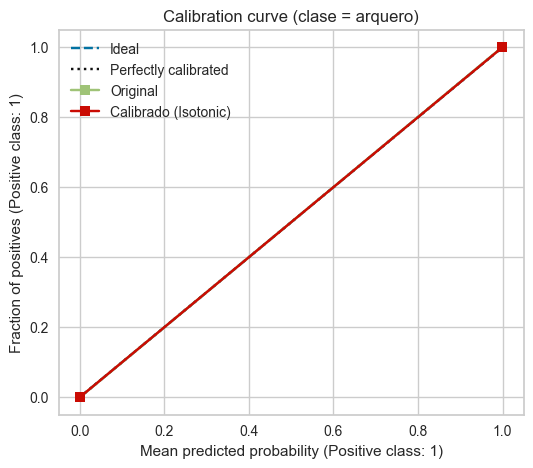

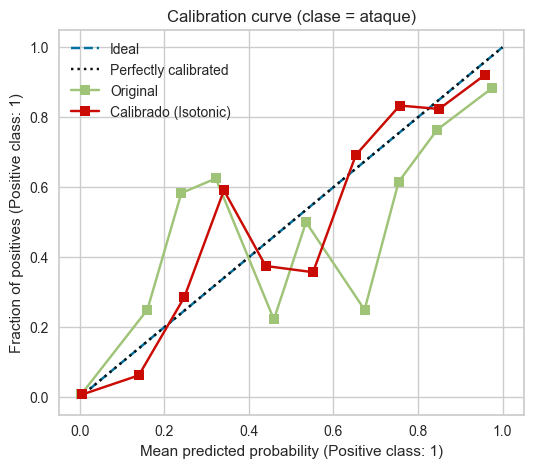

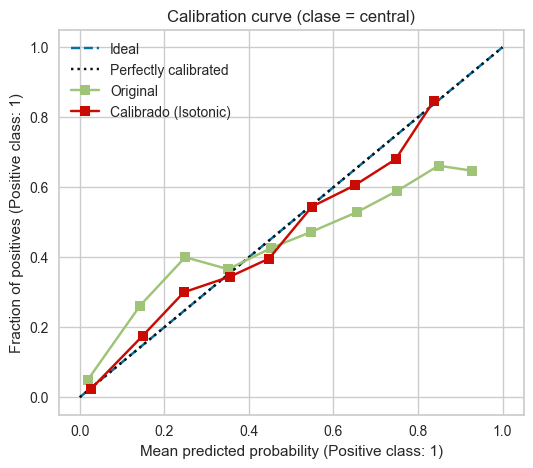

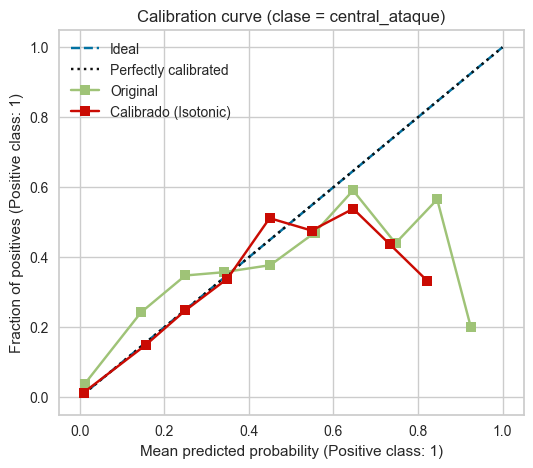

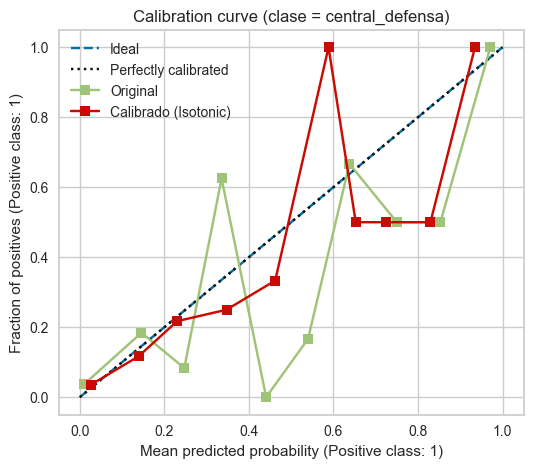

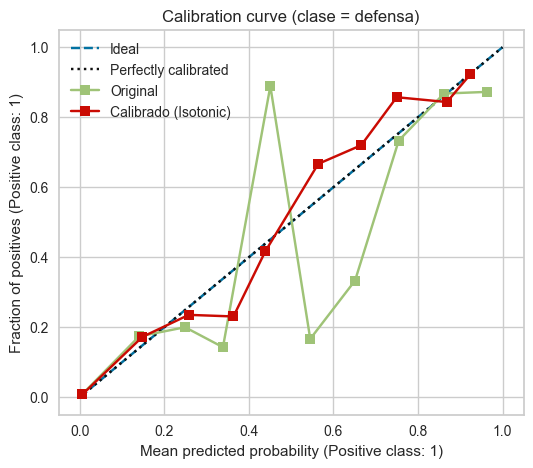

In [30]:
from sklearn.calibration import CalibrationDisplay


classes = np.array(sorted(pd.Series(y_train_full).unique()))
n_classes = len(classes)

def plot_binary_calibration(y_true, proba_orig, proba_cal, pos_label):
    y_bin = (y_true == pos_label).astype(int)
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.plot([0, 1], [0, 1], linestyle="--", label="Ideal")
    CalibrationDisplay.from_predictions(y_bin, proba_orig, n_bins=10, name="Original", ax=ax)
    CalibrationDisplay.from_predictions(y_bin, proba_cal,  n_bins=10, name="Calibrado (Isotonic)", ax=ax)
    ax.set_title(f"Calibration curve (pos_label={pos_label})")
    ax.legend(loc="best")
    plt.show()

def plot_multiclass_calibration(y_true, proba_orig, proba_cal, classes, max_plots=6):
    to_plot = classes[:min(len(classes), max_plots)]
    for c in to_plot:
        y_bin = (y_true == c).astype(int)
        fig, ax = plt.subplots(figsize=(6, 5))
        ax.plot([0, 1], [0, 1], linestyle="--", label="Ideal")
        CalibrationDisplay.from_predictions(y_bin, proba_orig[:, np.where(classes==c)[0][0]],
                                            n_bins=10, name="Original", ax=ax)
        CalibrationDisplay.from_predictions(y_bin, proba_cal[:,  np.where(classes==c)[0][0]],
                                            n_bins=10, name="Calibrado (Isotonic)", ax=ax)
        ax.set_title(f"Calibration curve (clase = {c})")
        ax.legend(loc="best")
        plt.show()

if n_classes == 2:
    pos_label = classes.max()
    plot_binary_calibration(
        y_true=y_test_full,
        proba_orig=proba_orig[:, np.where(classes==pos_label)[0][0]],
        proba_cal= proba_cal[:,  np.where(classes==pos_label)[0][0]],
        pos_label=pos_label
    )
else:
    plot_multiclass_calibration(
        y_true=y_test_full,
        proba_orig=proba_orig,
        proba_cal=proba_cal,
        classes=classes,
        max_plots=6
    )

Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>